In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


#import require libaries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


#import the dataset

In [4]:
df1=pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
df2=pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
print(df1.shape)
df1.head()

(8693, 14)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


#here y is Transported (dependent)
#first we handle train data(df1)

#to see the null values by using heat map
sns.heatmap(df1.isnull(),yticklabels=False, cbar=False,cmap='viridis')

In [5]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in df1.columns if df1[feature].isnull().sum()>1 and df1[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(df1[feature].isnull().mean(),4)))

HomePlanet: 0.0231% missing values
CryoSleep: 0.025% missing values
Cabin: 0.0229% missing values
Destination: 0.0209% missing values
VIP: 0.0234% missing values
Name: 0.023% missing values


<AxesSubplot:>

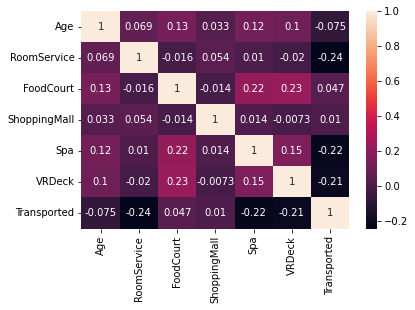

In [6]:
#will see collinarity between data columns
sns.heatmap(df1.corr(),annot=True)

#handle missing values

In [7]:
df1['HomePlanet'].fillna(df1['HomePlanet'].mode()[0], inplace=True)
df2['HomePlanet'].fillna(df2['HomePlanet'].mode()[0], inplace=True)
df1['CryoSleep'].fillna(df1['CryoSleep'].mode()[0], inplace=True)
df2['CryoSleep'].fillna(df2['CryoSleep'].mode()[0], inplace=True)
df1['Age'].fillna(df1['Age'].mean(), inplace=True)
df2['Age'].fillna(df2['Age'].mean(), inplace=True)
df1['VIP'].fillna(df1['VIP'].mode()[0], inplace=True)
df2['VIP'].fillna(df2['VIP'].mode()[0], inplace=True)
df1['RoomService'].fillna(df1['RoomService'].mean(), inplace=True)
df2['RoomService'].fillna(df2['RoomService'].mean(), inplace=True)

df1['PassengerId']=df1['PassengerId'].astype(int)
df2['PassengerId']=df2['PassengerId'].astype(int)
df1['VRDeck'].fillna(df1['VRDeck'].mean(), inplace=True)
df2['VRDeck'].fillna(df2['VRDeck'].mean(), inplace=True)
df1['Spa'].fillna(df1['Spa'].mean(), inplace=True)
df2['Spa'].fillna(df2['Spa'].mean(), inplace=True)
df1['Destination'].fillna(df1['Destination'].mode()[0], inplace=True)
df2['Destination'].fillna(df2['Destination'].mode()[0], inplace=True)
df1['FoodCourt'].fillna(df1['FoodCourt'].mean(), inplace=True)
df2['FoodCourt'].fillna(df2['FoodCourt'].mean(), inplace=True)
df1['ShoppingMall'].fillna(df1['ShoppingMall'].mean(), inplace=True)
df2['ShoppingMall'].fillna(df2['ShoppingMall'].mean(), inplace=True)

In [8]:
#no need of Name column to train the data
#so we drop the name column
df1.drop(['Name'],axis=1, inplace=True)
df2.drop(['Name'],axis=1, inplace=True)

In [9]:
#no need of passenger id  column to train the data
#so we drop the passenger column
df1.drop(['PassengerId'],axis=1, inplace=True)
df2.drop(['PassengerId'],axis=1, inplace=True)

In [10]:
#we can only Cabin column is not fixed , we will try to fix that data also

In [11]:
# split column and add new columns to df
df1[['Deck', 'Num', 'Side']] = df1['Cabin'].str.split('/', expand=True)
df2[['Deck', 'Num', 'Side']] = df2['Cabin'].str.split('/', expand=True)

In [12]:
#drop cabin column
df1.drop(['Cabin'],axis=1, inplace=True)
df2.drop(['Cabin'],axis=1, inplace=True)

In [13]:
df1['Side'].fillna(df1['Side'].mode()[0], inplace=True)
df2['Side'].fillna(df2['Side'].mode()[0], inplace=True)
df1['Deck'].fillna(df1['Deck'].mode()[0], inplace=True)
df2['Deck'].fillna(df2['Deck'].mode()[0], inplace=True)
df1['Num'].fillna(df1['Num'].median(), inplace=True)
df2['Num'].fillna(df2['Num'].median(), inplace=True)

In [14]:
df1.dtypes

HomePlanet       object
CryoSleep          bool
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
Deck             object
Num              object
Side             object
dtype: object

#we convert using label encoder and map method

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()

In [16]:
label_encoder

LabelEncoder()

#label encoder converts default into int
df1['HomePlanet']=label_encoder.fit_transform(df1['HomePlanet'])

In [17]:
#label encoder converts default into int
df1['HomePlanet']=label_encoder.fit_transform(df1['HomePlanet'])
df1['CryoSleep']=label_encoder.fit_transform(df1['CryoSleep']).astype(int)

df1['Destination']=label_encoder.fit_transform(df1['Destination'])
df1['VIP']=label_encoder.fit_transform(df1['VIP'])
df1['Deck']=label_encoder.fit_transform(df1['Deck'])
df2['Deck']=label_encoder.fit_transform(df2['Deck'])
df1['Side']=label_encoder.fit_transform(df1['Side'])
df1['Num']=df1['Num'].astype(int)

In [18]:
df2['HomePlanet']=label_encoder.fit_transform(df2['HomePlanet'])
df2['CryoSleep']=label_encoder.fit_transform(df2['CryoSleep'])

df2['Destination']=label_encoder.fit_transform(df2['Destination'])
df2['VIP']=label_encoder.fit_transform(df2['VIP'])
df2['Side']=label_encoder.fit_transform(df2['Side'])
df2['Num']=df2['Num'].astype(int)

Define X and y values

In [19]:
#transportted is the y value or dependent variable
y=df1['Transported']
X=df1.drop(['Transported'],axis=1)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

#logistic reression 

In [21]:
from sklearn.linear_model import LogisticRegression
clg = LogisticRegression()
# training the model
clg.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [22]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clg, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Cross-Validation Accuracy Scores [0.77155172 0.76724138 0.79454023 0.79597701 0.79280576 0.78417266
 0.8057554  0.77697842 0.8        0.8057554 ]


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [23]:
#predict output
y_pred = clg.predict(X_test)
y_pred_train = clg.predict(X_train)

finding accuracy

In [24]:
#finding accuracy
from sklearn.metrics import accuracy_score
accuracy_test= accuracy_score(y_test, y_pred)
accuracy_train=accuracy_score(y_train, y_pred_train)

In [25]:
accuracy_test

0.7682576193214491

In [26]:
accuracy_train

0.7888984756974403

Text(0.5, 1.0, 'Confusion Matrix')

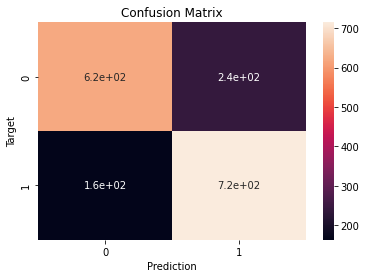

In [27]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

#2 random forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=13, n_informative=2, n_redundant=0,random_state=0, shuffle=False)
ran= RandomForestClassifier(max_depth=4, random_state=0)
ran.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=0)

In [29]:
print(ran.predict([[1,0,2,35.0,1,109.0,9.0,25.0,549.0,44.0,5,0,1]]))

[False]


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [30]:
y_pred = ran.predict(X_test)
y_pred_train = ran.predict(X_train)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_test= accuracy_score(y_test, y_pred)
accuracy_train=accuracy_score(y_train, y_pred_train)

In [32]:
accuracy_test

0.7717078780908568

In [33]:
accuracy_train

0.776962899050906

In [34]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(ran, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.75862069 0.76149425 0.75287356 0.78591954 0.77410072 0.76402878
 0.78129496 0.75971223 0.78561151 0.78273381]


In [35]:
score_final=scores.mean()

In [36]:
score_final

0.7706390060365501

In [37]:
df = pd.DataFrame(y_pred,columns=['Transported'])
df.head()

,Transported
0,False
1,False
2,True
3,False
4,True


In [38]:
#submission file
subm=pd.read_csv('../input/spaceship-titanic/sample_submission.csv')
subm.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [39]:
subm['Transported']=df['Transported']
subm.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,True


submission file

In [40]:
subm.to_csv('./submission.csv',index=False)